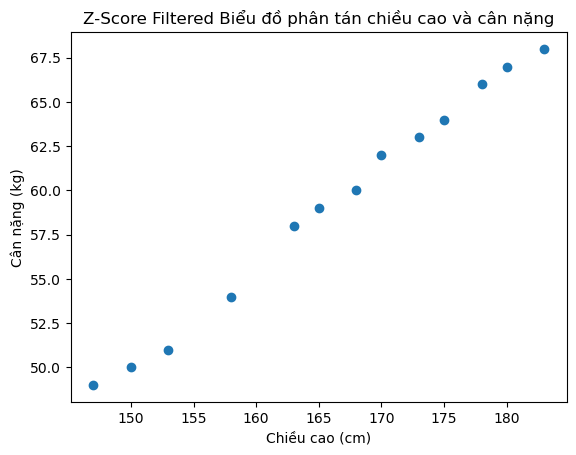

Hệ số R-squared của mô hình là: 0.9944856921763271


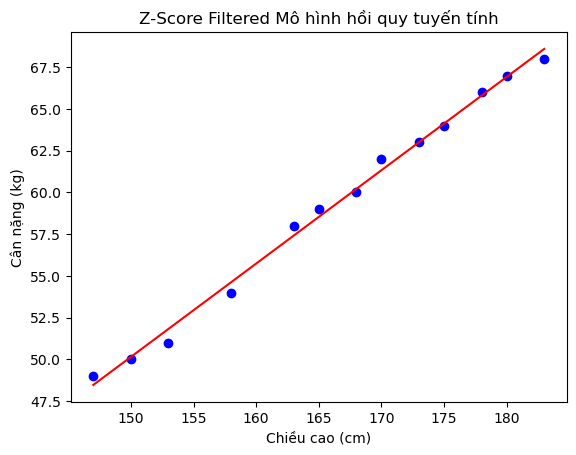

In [9]:
#Bai 4

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Dữ liệu đầu vào
chieu_cao = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183, 184, 150])
can_nang = np.array([49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68, 42, 90])

# Calculate z-scores of weights
z_scores = zscore(can_nang)
abs_z_scores = np.abs(z_scores)

# Filter outliers
filtered_entries = (abs_z_scores < 1.5)
filtered_chieu_cao = chieu_cao[filtered_entries]
filtered_can_nang = can_nang[filtered_entries]


# Display filtered data
plt.scatter(filtered_chieu_cao, filtered_can_nang)
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.title('Z-Score Filtered Biểu đồ phân tán chiều cao và cân nặng')
plt.show()

# Build linear regression model with filtered data
filtered_chieu_cao = filtered_chieu_cao.reshape(-1, 1)  # Reshape for scikit-learn
model = LinearRegression()
model.fit(filtered_chieu_cao, filtered_can_nang)

# Evaluate the model
R_squared = model.score(filtered_chieu_cao, filtered_can_nang)
print(f'Hệ số R-squared của mô hình là: {R_squared}')

# Predict and plot the model
du_doan_can_nang = model.predict(filtered_chieu_cao)
plt.scatter(filtered_chieu_cao, filtered_can_nang, color='blue')
plt.plot(filtered_chieu_cao, du_doan_can_nang, color='red')
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.title('Z-Score Filtered Mô hình hồi quy tuyến tính')
plt.show()